# 📝 Exercise M4.01

The aim of this exercise is two-fold:

* understand the parametrization of a linear model;
* quantify the fitting accuracy of a set of such models.

We will reuse part of the code of the course to:

* load data;
* create the function representing a linear model.

## Prerequisites

### Data loading

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

In [2]:
data

,Flipper Length (mm)
0,181.0
1,186.0
2,195.0
3,193.0
4,190.0
...,...
337,207.0
338,202.0
339,193.0
340,210.0


### Model definition

In [3]:
target

0      3750.0
1      3800.0
2      3250.0
3      3450.0
4      3650.0
        ...  
337    4000.0
338    3400.0
339    3775.0
340    4100.0
341    3775.0
Name: Body Mass (g), Length: 342, dtype: float64

In [4]:
def linear_model_flipper_mass(
    flipper_length, weight_flipper_length, intercept_body_mass
):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

## Main exercise

Given a vector of the flipper length, several weights and intercepts to
plot several linear model that could fit our data. Use the above
visualization helper function to visualize both the model and data.

In [5]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)

In [30]:
# Write your code here.
weights = [40,45,50,55]
intercepts = [-3000,-3500,-4000,-5000]

In [9]:
import seaborn as sns

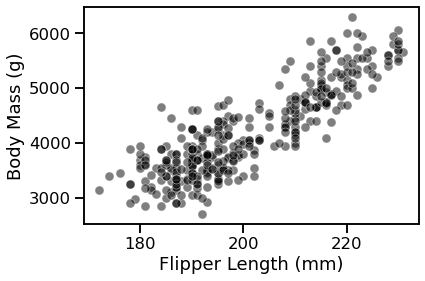

In [21]:
ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)

In [31]:
linear_model_flipper_mass(160, 40, -3000)

3400

In [37]:
results = np.array([np.array([fl, wt, y_int, linear_model_flipper_mass(fl, wt, y_int)]) \
                    for wt in weights \
                    for y_int in intercepts \
                    for fl in data.values.reshape(-1)])
results[:4]

array([[  181.,    40., -3000.,  4240.],
       [  186.,    40., -3000.,  4440.],
       [  195.,    40., -3000.,  4800.],
       [  193.,    40., -3000.,  4720.]])

In [44]:
results.shape

(5472, 4)

In [46]:
results = results.reshape(-1,342,4)

In [48]:
results.shape

(16, 342, 4)

In [53]:
results[0][1][1:3]

array([   40., -3000.])

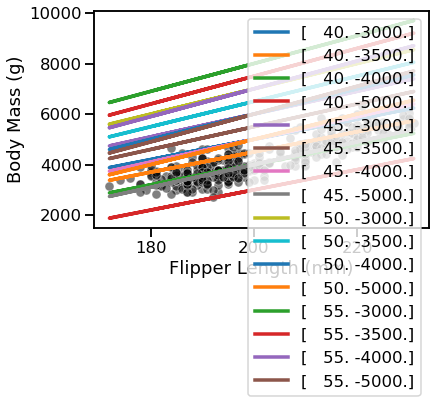

In [63]:
ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
for i in range(16):
    ax.plot(results[i][:,0], results[i][:,-1], label="{}".format(results[i][1][1:3]))
ax.legend()

In the previous question, you were asked to create several linear models.
The visualization allowed you to qualitatively assess if a model was better
than another.

Now, you should come up with a quantitative measure which will indicate the
goodness of fit of each linear model. This quantitative metric should result
in a single scalar and allow you to pick up the best model.

In [72]:
true_values = target.values

In [73]:
preds = results[0][:,-1]

In [77]:
np.mean((true_values-preds)**2)

870022.0760233918

In [88]:
def goodness_fit_measure(true_values, predictions):
    # Write your code here.
    # Define a measure indicating the goodness of fit of a model given the true
    # values and the model predictions.
    return np.sqrt((true_values-predictions)**2).mean()

In [89]:
# Uncomment the code below.
# for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
#     target_predicted = linear_model_flipper_mass(data, weight, intercept)
#     print(f"Model #{model_idx}:")
#     print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
#     print(f"Error: {goodness_fit_measure(target, target_predicted):.3f}\n")

In [90]:
for i in range(16):
    preds = results[i][:,-1]
    weight, y_int = results[i][1][1:3]
    error = goodness_fit_measure(true_values, preds)
    print(f"Model #{i}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {y_int:.2f} (g)")
    print(f"Error: {error}")

Model #0:
40.00 (g / mm) * flipper length + -3000.00 (g)
Error: 845.5555555555555
Model #1:
40.00 (g / mm) * flipper length + -3500.00 (g)
Error: 439.15204678362574
Model #2:
40.00 (g / mm) * flipper length + -4000.00 (g)
Error: 354.7953216374269
Model #3:
40.00 (g / mm) * flipper length + -5000.00 (g)
Error: 1165.1461988304093
Model #4:
45.00 (g / mm) * flipper length + -3000.00 (g)
Error: 1839.4298245614036
Model #5:
45.00 (g / mm) * flipper length + -3500.00 (g)
Error: 1339.4298245614036
Model #6:
45.00 (g / mm) * flipper length + -4000.00 (g)
Error: 847.7046783625731
Model #7:
45.00 (g / mm) * flipper length + -5000.00 (g)
Error: 338.5233918128655
Model #8:
50.00 (g / mm) * flipper length + -3000.00 (g)
Error: 2844.0058479532163
Model #9:
50.00 (g / mm) * flipper length + -3500.00 (g)
Error: 2344.0058479532163
Model #10:
50.00 (g / mm) * flipper length + -4000.00 (g)
Error: 1844.0058479532163
Model #11:
50.00 (g / mm) * flipper length + -5000.00 (g)
Error: 851.3157894736842
Model #

Model 7 looks good. Model #7:
45.00 (g / mm) * flipper length + -5000.00 (g)
Error: 338.5233918128655